In [1]:
import sklearn

In [2]:
sklearn.__version__

'1.0.2'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.DataFrame(columns=['Casado','Comprou'])
df

,Casado,Comprou


In [7]:
df.loc[0,:]=['Sim',1]
df.loc[1,:]=['Sim',1]
df.loc[2,:]=['Não',1]
df.loc[3,:]=['Sim',0]
df.loc[4,:]=['Não',0]
df.loc[5,:]=['Não',1]
df.loc[6,:]=['Sim',1]
df.loc[7,:]=['Não',0]

df

,Casado,Comprou
0,Sim,1
1,Sim,1
2,Não,1
3,Sim,0
4,Não,0
5,Não,1
6,Sim,1
7,Não,0


In [9]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
enc.fit_transform(df)

array([[1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.]])

In [10]:
enc.categories_

[array(['Não', 'Sim'], dtype=object), array([0, 1], dtype=object)]

In [11]:
df_pre = pd.DataFrame(enc.fit_transform(df), columns=df.columns, dtype = int)
df_pre

,Casado,Comprou
0,1,1
1,1,1
2,0,1
3,1,0
4,0,0
5,0,1
6,1,1
7,0,0


In [12]:
X= df_pre[['Casado']]
X

,Casado
0,1
1,1
2,0
3,1
4,0
5,0
6,1
7,0


In [15]:
y=df_pre.Comprou
y

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    0
Name: Comprou, dtype: int32

In [16]:
from sklearn.naive_bayes import CategoricalNB

cnb=CategoricalNB(alpha=0)
cnb.fit(X,y)

C:\Users\Katita\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0)

In [18]:
para_predizer=pd.DataFrame(columns=['Casado'])
para_predizer.loc[0,:]=[0]
para_predizer.loc[1,:]=[1]
para_predizer

,Casado
0,0
1,1


In [19]:
cnb.predict_proba(para_predizer)

array([[0.5 , 0.5 ],
       [0.25, 0.75]])

# Problema de verdade

In [21]:
df=pd.read_csv('base_categoricalnb.csv')
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,yes


In [22]:
from sklearn.model_selection import train_test_split

In [26]:
X= df.drop('y',axis=1)
y=df.y

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)

In [28]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
X_tr2=pd.DataFrame(enc.fit_transform(X_tr), columns=X_tr.columns, dtype=int)
X_tr2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,1,1,1,1,2,0,0,3,3
1,4,1,6,0,0,0,1,4,3
2,7,0,3,0,2,2,0,7,1
3,4,0,6,0,2,0,1,6,3
4,9,1,2,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...
28826,11,1,7,0,2,0,0,9,4
28827,1,1,5,1,0,2,1,6,3
28828,8,2,3,0,1,1,0,1,3
28829,0,2,3,0,0,0,0,0,2


In [29]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single', 'unknown'], dtype=object),
 array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree', 'unknown'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object)]

In [30]:
X_ts2=pd.DataFrame(enc.transform(X_ts),columns=X_ts.columns, dtype=int)
X_ts2

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,0,1,6,0,2,2,0,3,4
1,5,1,0,1,2,0,1,6,2
2,7,2,3,0,2,0,0,6,3
3,10,1,3,0,0,2,1,6,2
4,1,1,1,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...
12352,2,2,6,1,2,0,1,4,0
12353,0,2,3,0,0,0,0,3,2
12354,9,2,5,0,2,0,0,1,1
12355,4,2,6,0,2,2,1,6,3


In [35]:
from sklearn.preprocessing import LabelEncoder

enc2=LabelEncoder()
y_tr2=enc2.fit_transform(y_tr)
y_tr2
len(y_tr2)

28831

In [36]:
y_ts2 = enc2.transform(y_ts)
y_ts2

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
cnb2 = CategoricalNB(alpha=0)
cnb2.fit(X_tr2,y_tr2)

C:\Users\Katita\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0)

In [38]:
pred = cnb2.predict_proba(X_ts2)
pred

array([[0.82459352, 0.17540648],
       [0.97221911, 0.02778089],
       [0.91123809, 0.08876191],
       ...,
       [0.81793751, 0.18206249],
       [0.9515477 , 0.0484523 ],
       [0.97593682, 0.02406318]])

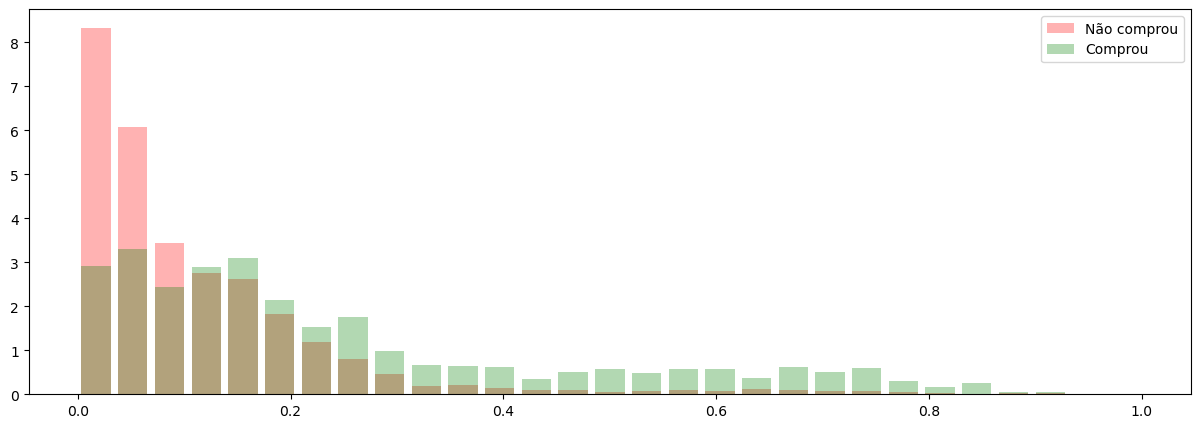

In [42]:
plt.figure(figsize=(15,5))

plt.hist(pred[y_ts2==0,1], bins=np.linspace(0,1,30), color='r',alpha=.3, rwidth = .8, density=True, label='Não comprou')
plt.hist(pred[y_ts2==1,1], bins=np.linspace(0,1,30), color='g',alpha=.3, rwidth = .8, density=True, label='Comprou')
plt.legend()
plt.show()

# Alpha

In [43]:
X=df_pre[['Casado']]
y=df_pre.Comprou

cnb=CategoricalNB(alpha=0, min_categories=3)

cnb.fit(X,y)

C:\Users\Katita\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


CategoricalNB(alpha=0, min_categories=3)

In [45]:
para_predizer = pd.DataFrame(columns=['Casado'])
para_predizer.loc[0,:]=[2]
para_predizer

,Casado
0,2


In [46]:
cnb.predict_proba(para_predizer)

array([[0.5, 0.5]])

In [47]:
X=df_pre[['Casado']]
y=df_pre.Comprou

cnb=CategoricalNB(alpha=1, min_categories=3)

cnb.fit(X,y)

CategoricalNB(alpha=1, min_categories=3)

In [48]:
cnb.predict_proba(para_predizer)

array([[0.44444444, 0.55555556]])